## 1) Fix histEqualization()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import acos, sqrt, pi, cos, sin, exp, floor

def cvtGrayscale(img):
    if len(img.shape) < 3:
        return img
    b, l, c = img.shape
    gray = np.zeros((b,l), dtype = "int64")
    for i in range(b):
        for j in range(l):
            gray[i][j] = (0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2])
    return gray

## Q1) You have already written codes for median filtering, edge detection, contrast stretching and histogram equalization for grayscale images. Now you are required to extend those codes to colorful RGB images using the methods discussed in the class.

### 1) Implement a function medianFilter which takes in an RGB image im, filter size k and use it for the image NoisySimba.png and report the output.

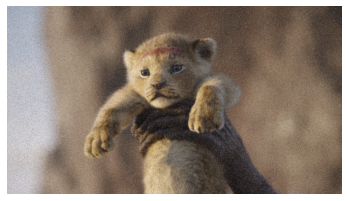

In [2]:
img_simba = cv2.imread("../images/NoisySimba.png")
img_simba = cv2.cvtColor(img_simba, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img_simba)

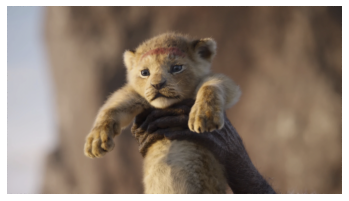

In [3]:
def medianFilter(img, k):
    b ,l, c = img.shape
    gray = cvtGrayscale(img)
    tmp = np.zeros((k,k))
    out = np.copy(img)
    p = k//2
    for i in range(k//2,(b-(k//2))):
        for j in range(k//2,(l-(k//2))):
            if k != 1:
                tmp = gray[i-p:i+p+1,j-p:j+p+1]
            else:
                tmp = gray[i][j]
            index = np.where(tmp == np.median(tmp))
            u = index[0][0]
            v = index[1][0]
            out[i:i+1,j:j+1,0:3] = img[u+i-p][v+j-p]
    return out

plt.axis("off")
plt.imshow(medianFilter(img_simba, 5))

### 2) Write a function colorLinContrastStretching which takes an image im as input and returns a contrast-enhanced version of the image. Apply the function on fog.jpeg and display your result.

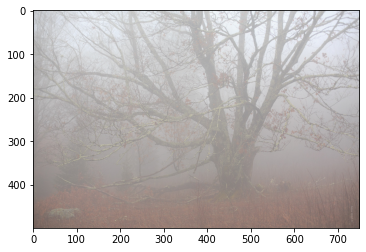

In [4]:
img_fog = cv2.imread("../images/fog.jpeg")
img_fog = cv2.cvtColor(img_fog, cv2.COLOR_BGR2RGB)
plt.imshow(img_fog)

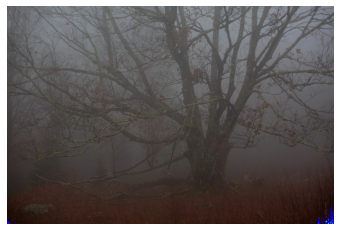

In [5]:
def colorLinContrastStretching(img):
    a = 0
    b = 150
    w, l, c = img.shape
    out = np.copy(img)
    gray = cvtGrayscale(img)
    minimum = np.min(gray)
    maximum = np.max(gray)
    for i in range(w):
        for j in range(l):
            inc = a + (float)((b-a)*(gray[i][j] - minimum))/(maximum - minimum) - gray[i][j]
            for k in range(c):
                out[i][j][k] = img[i][j][k] + inc
                if out[i][j][k] > 255:
                    out[i][j][k] = 255
                if out[i][j][k] < 0:
                    out[i][j][k] = 0
    return out

plt.axis("off")
plt.imshow(colorLinContrastStretching(img_fog))

### 3) Perform histogram equalization on the image fog.jpeg and show the result.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


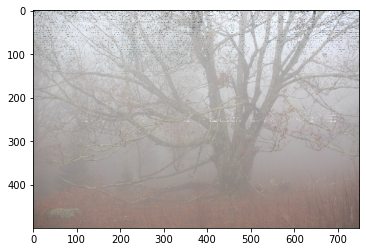

In [6]:
def histEqualization(img):
    with np.errstate(divide='ignore', invalid='ignore'):
        b, l, c = img.shape
        img = img.astype('int64')
        hsi = np.copy(img) #np.array(img.shape, dtype = "float32")
        out = np.copy(img)

        #RGB to HSI conversion
        for i in range(b):
            for j in range(l):
                r, g, b = img[i][j]
                hsi[i][j][0] = 0.5*(r - g + (r - b)/(sqrt((r-g)**2 + (r-b)*(g-b))+0.0001))
                hsi[i][j][0] = acos(np.maximum(-1 , np.minimum(hsi[i][j][0], 1)))
                if b > g:
                    hsi[i][j][0] = ((360*pi)/180.0) - hsi[i][j][0]
                hsi[i][j][1] = 1 - (3/(r+g+b+0.001)*(np.min(img[i][j])))
                hsi[i][j][2] = (r+g+b)/3

        freq = np.zeros(256)
        newint = np.zeros(256, dtype = "int64")
        sigma = 0

        for i in range(b):
            for j in range(l):
                freq[hsi[i][j][2]] += 1
        freq = freq/(b*l)

        for i in range(256):
            sigma += freq[i]
            newint[i] = 255*sigma

        for i in range(b):
            for j in range(l):
                hsi[i][j][2] = newint[hsi[i][j][2]]
                h,s,i = hsi[i][j]
                if h < 2*pi/3 and h >= 0:
                    out[i][j][2] = i*(1-s)
                    out[i][j][1] = i*(1 + (s*cos(h))/cos(pi/3-h))
                    out[i][j][0] = 3*i - (out[i][j][2] + out[i][j][0])
                elif h >= 2*pi/3 and h < 4*pi/3:
                    out[i][j][0] = i*(1-s)
                    out[i][j][1] = i*(1 + (s*cos(h - 2*pi/3))/cos(pi/3-(h - 2*pi/3)))
                    out[i][j][2] = 3*i - (out[i][j][1] + out[i][j][0])
                else:
                    out[i][j][1] = i*(1-s)
                    out[i][j][2] = i*(1 + (s*cos(h - 4*pi/3))/cos(pi/3-(h - 4*pi/3)))
                    out[i][j][0] = 3*i - (out[i][j][2] + out[i][j][1])
        return out

plt.imshow(histEqualization(img_fog))

### 4) Demonstrate ”Vintage effect”, ”Matrix effect”, Vignetting and duo-tone on any image of your choice. Note: You are allowed to use cv2.LUT() for duo-tone.

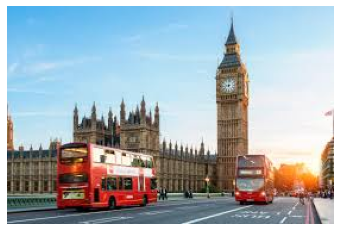

In [7]:
img_london = cv2.imread("../images/london.jpeg")
img_london = cv2.cvtColor(img_london, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img_london)

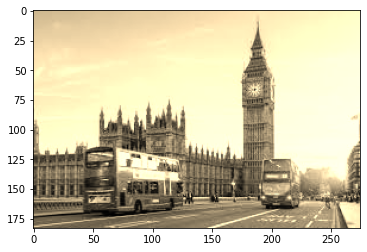

In [8]:
def vintage(img):
    out = np.copy(img)
    out = cv2.transform(img,np.matrix([[0.272, 0.534, 0.131],[0.349, 0.686, 0.168],[0.393, 0.769, 0.189]]))
    out[np.where(out > 255)] = 255
    out = np.array(out, dtype=np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)
    return out

plt.imshow(vintage(img_london))

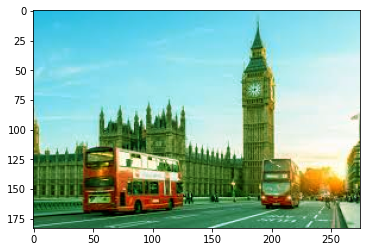

In [9]:
def matrix(img):
    out = np.zeros(img.shape, dtype='int64')
    b,l,c = img.shape
    for i in range(b):
        for j in range(l):
            out[i][j][0] = (255)*((img[i][j][0])**(1.5))/((np.max(img[:,:,0])**(1.5))) 
            out[i][j][1] = (255)*((img[i][j][1])**(0.8))/((np.max(img[:,:,0])**(0.8))) 
            out[i][j][2] = (255)*((img[i][j][2])**(1.5))/((np.max(img[:,:,0])**(1.5)))
    return out

plt.imshow(matrix(img_london))                                  

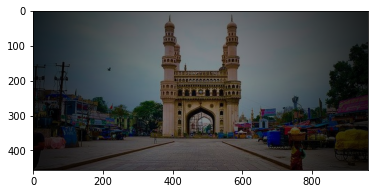

In [17]:
img_char = cv2.imread("../images/charminar.jpeg")
img_char = cv2.cvtColor(img_char, cv2.COLOR_BGR2RGB)
def createpsf(img, sigma):
    b,l = img.shape
    psf = np.zeros((b,l))
    s = 2*(sigma**2)
    for i in range(b):
        for j in range(l):
            psf[i][j] = (1/(pi*s))*np.exp(-1*((i-b//2)**2 + (j-l//2)**2)/s)
    return psf

def vignette(img):
    row,col,cha = img.shape
    resultant_kernel = createpsf(cvtGrayscale(img),300) 
    mask = 255 * resultant_kernel / np.linalg.norm(resultant_kernel)
    out = np.copy(img)
    for i in range(3):
        out[:,:,i] = out[:,:,i] * mask
    out[np.where(out > 255)] = 255
    return out
plt.imshow(vignette(img_char))

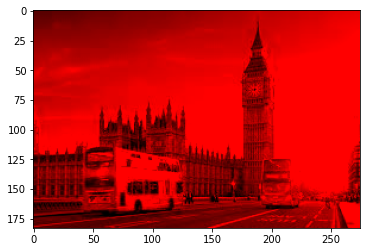

In [11]:
def exponential_function(channel, exp):
    table = np.array([min((i**exp), 255) for i in np.arange(0, 256)]).astype("uint8") # creating table for exponent
    channel = cv2.LUT(channel, table)
    return channel

def duotone(img, number):
    out = np.copy(img)
    for i in range(3):
        if i == number:
            out[:, :, i] = exponential_function(out[:, :, i], 1.05) # applying exponential function on slice
        else:
            out[:, :, i] = 0 # setting values of all other slices to 0
    return out

plt.imshow(duotone(img_london, 0))